1. Для начала, давайте посмотрим на распределение посещений сайта по дням.        
 Постройте график с распределением количества посещений от ботов и обычных пользователей сайта Яндекс.Метрика. 
 Данные для построения графика хранятся здесь.
 https://stepik.org/media/attachments/lesson/361618/step_1_lesson_7.csv    

**Выберите верные утверждения:**      
 - 15 июня сайт посетило наименьшее число ботов
 - **Наименьшее число посещений пользователей-людей наблюдается 15 июня**
 - 17 июня ботов было примерно в два раза меньше, чем 15 июня
 - 17 июня сайт посетило наибольшее число ботов, по сравнению с 15 и 16 июня
 - Наименьшее число посещений наблюдается 17 июня только среди пользователей"

In [29]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from io import BytesIO
import requests

url = 'https://stepik.org/media/attachments/lesson/361618/step_1_lesson_7.csv'
df = pd.read_csv(url)
df.head()

,date,user_type,visits
0,2020-06-15,People,417.0
1,2020-06-15,Robots,177.0
2,2020-06-16,People,472.0
3,2020-06-16,Robots,91.0
4,2020-06-17,People,475.0


<Figure size 1296x432 with 0 Axes>

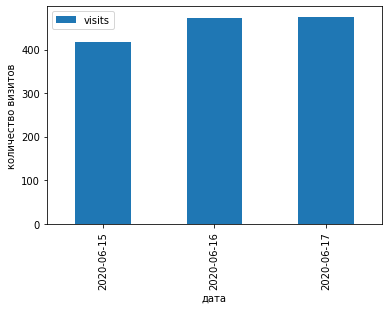

In [30]:
plt.figure(figsize=(18, 6))
df.query('user_type == "People"').plot(x = 'date', y = 'visits', kind = 'bar', xlabel = 'дата', ylabel = 'количество визитов')

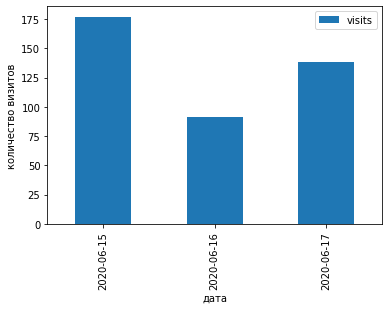

In [31]:
df.query('user_type == "Robots"').plot(x = 'date', y = 'visits', kind = 'bar', xlabel = 'дата', ylabel = 'количество визитов')

2. Определите процент посещений сайта Яндекс.Метрики с бразузера Google Chrome.

In [32]:
chrome_url = 'https://stepik.org/media/attachments/lesson/361618/step_2_lesson_7.csv'
chrome_data = pd.read_csv(chrome_url)
count_chrome = chrome_data.query('browser == "Google Chrome"').visits.count()
count_visits = chrome_data.visits.sum()
round((count_visits/count_chrome) * 0.1, 0)

59.0

3. Давайте выясним, с какого браузера приходит больше всего ботов. 
Посмотрите на данные и определите, 
у какого браузера самая большая доля посещений сайта ботами от общего числа посещений?
В качестве ответа укажите название браузера.

In [33]:
url = 'https://stepik.org/media/attachments/lesson/361618/step_3_lesson_7.csv'
df = pd.read_csv(url)
tt = df.pivot(index = "browser",columns = 'user_type', values = 'visits')\
             .fillna(0)
tt['persent_bot'] = tt.query('Robots > 0.0').Robots/(tt.People + tt.Robots)
tt.sort_values('persent_bot', ascending = False)[:3]

user_type,People,Robots,persent_bot
browser,,,
UCWEB,0.0,4.0,1.000000
Safari,19.0,22.0,0.536585
Firefox,27.0,31.0,0.534483


4. Выгрузите данные, содержащие информацию о дне, типе пользователя, браузере.
Создайте колонку с метрикой доли заходов на сайт для каждого из этих разрезов.
В ответе укажите **процент открытий сайта настоящими пользователями Safari (не ботами) с точностью до 1 знака после точки**.
Hint:найти долю заходов конкретных типов пользователей с конкретного браузера от вообще всех-всех заходов на сайт за этот день

In [45]:
df = pd.read_csv('https://stepik.org/media/attachments/lesson/361618/step_4_lesson_7.csv')
df.head()

,date,browser,user_type,visits
0,2020-06-15,Google Chrome,People,250.0
1,2020-06-15,Google Chrome,Robots,104.0
2,2020-06-15,Yandex Browser,People,47.0
3,2020-06-15,Firefox,Robots,31.0
4,2020-06-15,Chrome Mobile,People,31.0


In [46]:
#fd['count'] = round(fd.visits/count * 100, 2)
count = df.visits.sum()
count = df.query('user_type == "People" and browser == "Safari"').visits/df.visits.sum()
round(count * 100, 2)

7    3.2
Name: visits, dtype: float64

5. Другой аналитик уже агрегировал часть данных из метрики. Вам нужно объединить усилия, чтобы получить финальный отчет.
  1. Прочитайте дополнительные данные из Google SpreadSheet, 
  - объедините вашу таблицу из предыдущего шага с таблицей аналитик
  - посчитайте количество визитов на человека (отношение visits к users) 
в разрезе по браузеру и значениям Robots/People.
В ответе укажите, **сколько визитов на уникального пользователя совершается ботами с браузера Google Chrome (округлите до целого)** 

from io import BytesIO     
import requests    
r = requests.get('https://docs.google.com/spreadsheets/d/e/2PACX-1vQWMsvBTVio9C7IOOxfFO9C15BRHyME-_ENHqBodDOjuiHwk9fCuF5hUVmDs497PZOqPYK3exdSikOK/pub?gid=1006633900&single=true&output=csv')   
data = r.content   

df = pd.read_csv(BytesIO(data))    


In [47]:
r = requests.get('https://docs.google.com/spreadsheets/d/e/2PACX-1vQWMsvBTVio9C7IOOxfFO9C15BRHyME-_ENHqBodDOjuiHwk9fCuF5hUVmDs497PZOqPYK3exdSikOK/pub?gid=1006633900&single=true&output=csv')
data = r.content
table2 = pd.read_csv(BytesIO(data))
table2.head()

,date,browser,user_type,users
0,2020-06-15,Google Chrome,People,240.0
1,2020-06-15,Google Chrome,Robots,104.0
2,2020-06-15,Yandex Browser,People,44.0
3,2020-06-15,Chrome Mobile,People,30.0
4,2020-06-15,Firefox,Robots,29.0


In [50]:
full_data = table2.merge(df, on = ['date', 'browser', 'user_type'])
full_data['ratio'] = full_data.visits/full_data.users
full_data.head()

,date,browser,user_type,users,visits,ratio
0,2020-06-15,Google Chrome,People,240.0,250.0,1.041667
1,2020-06-15,Google Chrome,Robots,104.0,104.0,1.000000
2,2020-06-15,Yandex Browser,People,44.0,47.0,1.068182
3,2020-06-15,Chrome Mobile,People,30.0,31.0,1.033333
4,2020-06-15,Firefox,Robots,29.0,31.0,1.068966


In [52]:
full_data.query('browser == "Google Chrome" and user_type == "Robots"').ratio

1    1.0
Name: ratio, dtype: float64